<h1 style="text-align:center">
    Movies
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Laura Rodríguez Ropero
</h3>
    
<h3 style="text-align:center">
    19/12/2024
</h3>

<hr>

# Introducción

<br>

<font color="darkblue">
El presente documento detalla el desarrollo de un proyecto de programación en Python, basado en las indicaciones y directrices establecidas en la guía del curso. Este proyecto tiene como objetivo principal consolidar habilidades en el diseño y ejecución de programas, enfatizando la correcta estructuración del código, el uso de funciones bien definidas y la implementación de pruebas exhaustivas para garantizar su funcionalidad.

El análisis se centra en un dataset relacionado con películas de cine provenientes de la base de datos IMDB, lo que permite explorar y extraer información clave acerca de títulos, géneros, presupuestos y otros aspectos de interés.

A lo largo del trabajo, se abordarán problemáticas específicas relacionadas con el manejo de datos y la automatización de procesos, empleando herramientas propias de Python y bibliotecas especializadas. Además, se seguirán buenas prácticas de programación, como la documentación clara y concisa del código, el cumplimiento de estándares como PEP-8 y la validación rigurosa de resultados mediante pruebas.

Finalmente, se incluyen reflexiones sobre los retos encontrados durante el desarrollo, los aprendizajes obtenidos y las posibles áreas de mejora, garantizando una comprensión integral del proceso de análisis de datos y su aplicación en un contexto real.

<br>

A partir de los datos proporcionados, he conseguido implementar todos los procesos correctamente, pero es probable que algunos detalles no están completamente optimizados o funcionales, pues es la primera vez que trabajo con la mayoría de las librerías. 

<br>

Aunque al final de este notebook detallaré la calificación que calculo honestamente, globalmente, siguiendo las puntuaciones que se asigna a cada apartado, diría que he obtenido una nota de 9.8 sobre 10.
</font>

<br>

# Librerías y constantes globales

In [221]:
# Librerías:

import kagglehub
import csv
from typing import List
from typing import Tuple
from typing import Set
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

In [222]:
# Constantes globales:

MOVIES_DATA = f"{kagglehub.dataset_download("carolzhangdc/imdb-5000-movie-dataset")}/movie_metadata.csv"
FEW_FIELDS_PATH = f"./data_in/few_fields.txt"

# Parte A. Ejercicios básicos sin usar `pandas` [2 puntos]

Esta parte inicial debe realizarse sin usar la librería `pandas`. Para practicar con esta librería, se plantean otros apartados más abajo.

### A.1. Exploración inicial básica del archivo de datos

Deseamos cargar el archivo de datos, que tiene un formato `csv`.
En este apartado, te recomiendo fuertemente usar la librería `cvs`,
que deberás importar en la primera celda del script, más arriba, no aquí.

Finalmente, observando el test, verás que se carga por separado la cabecera y las filas de datos.

In [223]:
def load_full_data(path: str) -> Tuple[List[str], List[List[str]]]:
    """
    Loads data from a CSV file and returns the header and the rest
    of the data separated

    Parameters
    ----------
    path : str
        CSV file path

    Returns
    -------
    List[str]
        List with the filenames of the header
    List[List[str]]
        List of lists of data

    Examples
    ---------
    >>> load_full_data(MOVIE_DATA)

    """
    with open(path, mode='r', encoding='utf-8') as movie_data:
        movie_reader = csv.reader(movie_data)
        full_header = next(movie_reader)
        full_list_data = [row for row in movie_reader]
        return full_header, full_list_data

In [224]:
full_header, full_list_data = load_full_data(MOVIES_DATA)

print(full_header)
print()
print(full_list_data[0:5])

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

[['Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000'], ['Color', 'Gore Verbinski', '302', '169', '563', '1000', 'Orlando Bloom', '40000', '309404152', 'Action|Adventure|F

Ahora, querríamos ver las posiciones de los identificadores de los campos, dados en la línea cabecera.

In [225]:
def list_of_enumerated_headers(full_header: str) -> List[Tuple[int, str]]:
    """
    Generates a list of the headers of the CSV file numerated

    Parameters
    ----------
    full_header : List[str]
        List of filenames of the header

    Returns
    -------
    List[Tuple[int, str]]
    """
    return list(enumerate(full_header))

In [226]:
list_of_enumerated_headers = list_of_enumerated_headers(full_header)
print(list_of_enumerated_headers)

[(0, 'color'), (1, 'director_name'), (2, 'num_critic_for_reviews'), (3, 'duration'), (4, 'director_facebook_likes'), (5, 'actor_3_facebook_likes'), (6, 'actor_2_name'), (7, 'actor_1_facebook_likes'), (8, 'gross'), (9, 'genres'), (10, 'actor_1_name'), (11, 'movie_title'), (12, 'num_voted_users'), (13, 'cast_total_facebook_likes'), (14, 'actor_3_name'), (15, 'facenumber_in_poster'), (16, 'plot_keywords'), (17, 'movie_imdb_link'), (18, 'num_user_for_reviews'), (19, 'language'), (20, 'country'), (21, 'content_rating'), (22, 'budget'), (23, 'title_year'), (24, 'actor_2_facebook_likes'), (25, 'imdb_score'), (26, 'aspect_ratio'), (27, 'movie_facebook_likes')]


### A.2. Campos principales de una película

Los campos (columnas) del archivo son demasiados. No nos interesan todos ellos. Dada una lista con todos los campos, se pide extraer otra lista sólo con los campos con los que vamos a trabajar en los siguientes apartados: `movie_title`, `title_year`, `director_name`, `actor_1_name`, `language`, `country`, `color`, `budget`, `imdb_score` y `movie_imdb_link`.

In [227]:
def main_data_from_item(row: List[str]) -> List[str]:
    """ 
    Generates a list of the main columns of the register (row) given

    Parameters
    ----------
    row : List[str]
        List of register's atributes

    Returns
    -------
    List[Tuple[int, str]]
        List of a register's main atributes
    """
    mapa_columnas = {header: index for index, header in list_of_enumerated_headers}
    main_columns = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 
                    'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']
    indexes = []
    for header in main_columns: 
        indexes.append(mapa_columnas[header])
        
    return [row[index] for index in indexes]

In [228]:
print(main_data_from_item(full_header))

print()

datos_avatar_2009 = main_data_from_item(full_list_data[0])
print(datos_avatar_2009)

print()

datos_star_wars_7 = main_data_from_item(full_list_data[4])
print(datos_star_wars_7)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

['Avatar\xa0', '2009', 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1']

['Star Wars: Episode VII - The Force Awakens\xa0            ', '', 'Doug Walker', 'Doug Walker', '', '', '', '', '7.1', 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1']


### A.3. Algunos ajustes en los campos

Observa la anomalía en el string del título de la película. También, queremos tratar algunos campos como numéricos, ya sea enteros (el año y el presupuesto) o reales (la valoración). (Algunos campos numéricos enteros están vacíos en el archivo de datos; para ellos, el valor imputado será `-1`.) Además, en las urls de las películas no necesitaremos el fragmento final, iniciado con `?ref_`.

In [229]:
def datatypes_arranged(row: List[str]) -> List[str]:
    """
    Arrages datatypes of the atributes of the register given
    Errors in strings ('movie_title')
    Empty numeric ('title_year', 'budget') data to -1
    Empty numeric ('imdb_score') data to -1.0
    Delete ?ref_ in film's urls ('movie_imdb_link')

    Parameters
    ----------
    row : List[str]
        List of register's atributes

    Returns
    -------
    List[Tuple[int, str]]
        List of a register's main atributes
    """

    row[0] = row[0].strip()
    row[1] = -1 if not row[1] else int(row[1])
    row[7] = -1 if not row[7] else int(row[7])
    row[8] = -1.0 if not row[8] else float(row[8])
    row[9] = re.sub(r'\?ref_.*', '', row[9])

    return row

In [230]:
print(datatypes_arranged(datos_avatar_2009))

print(datatypes_arranged(datos_star_wars_7))

['Avatar', 2009, 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
['Star Wars: Episode VII - The Force Awakens', -1, 'Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


### A.4. Recuperación de alguna información básica

<br>

Diseña funciones para recuperar la siguiente información:

<itemize>
    <li> El conjunto de valores posibles del campo `Color`.
    <li> Los títulos de película de nuestro archivo (limpios de caracteres extraños),
        junto con la cantidad de calificadores (un entero), que contengan la subcadena "Victor".
</itemize>

In [231]:
def values_of_color(file: List[List[str]]) -> Set[str]:
    """
    Saves the color options in the CSV file

    Parameters
    ----------
    file : List[List[str]]
        CSV file already readen

    Returns
    -------
    colors : Set[str] 
        List of unique values of the field color
    """
    colors = set()
    for row in file:
        if row[0]:
            colors.add(row[0])
    return colors

In [232]:
def get_victor_films(file: List[List[str]]) -> List[str]:
    """
    Saves films that contain 'Victor' in its title

    Parameters
    ----------
    file : str 
        Ruta al archivo CSV.

    Returns
    -------
    colors : List[str] 
        List of films that contain 'Victor' in its title
    """
    victor = []
    for row in file:
        title = row[11]
        if 'victor' in title.lower():
            clean_title = title.strip()
            qualifiers = row[2].strip()
            qualifiers_int = int(qualifiers)
            victor += [(clean_title, qualifiers_int)]
    
    return victor

In [233]:
colors = values_of_color(full_list_data)
victor = get_victor_films(full_list_data)
print(colors)
print(victor)

{' Black and White', 'Color'}
[('Victor Frankenstein', 159), ('Victor Frankenstein', 159), ('The Young Victoria', 188), ('Victor Frankenstein', 159), ('Raising Victor Vargas', 59)]


# B Datos en un diccionario [2 puntos]

### B.1. Carga únicamente de datos que vamos a usar

En lugar de cargar *todos* los datos del archivo, luego generar otro archivo con los datos que nos interesan y luego ajustarlos, es mejor diseñar una función que recorre el archivo de datos y, de cada línea del archivo, *únicamente* retiene la parte que nos interesa, cargando la cabecera por un lado y, por otro, la lista de datos de interés, ajustados como ya hemos dicho.

Cargaremos esta información en un diccionario, cuyas claves serán pares `(título, año)` y cuyos valores se recogen en una lista con el resto de los campos.

Además, los datos de cada película tras la clave `(título, año)` están repetidas en el archivo de datos, con todos los datos idénticos; y lo que es peor: alguna que está repetida, pero con algún dato distinto. En ambos casos, para simplificar, adoptamos el criterio de registrar únicamente la primera aparición de los datos de una misma película y año.

In [234]:
def load_main_data(path: str) -> dict:
    """
    Charges data from a CSV file to a dictionary keeping only the main fields

    Parameters
    ----------
    file : List[List[str]]
        CSV file
    main_fiels : List[str]
        List of fields of interest

    Returns
    -------
    dict
        A dictionary with:
        - ("title", "year"): "" the rest of atributes
    """
    main_header = ['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 
                    'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']
    
    main_dict_data = {}

    with open(path, mode='r', encoding='utf-8') as movie_data:
        movie_reader = csv.reader(movie_data)
        headers = next(movie_reader)
        rows = list(movie_reader)

    header_indexes = {heater: idx for idx, heater in enumerate(headers)}

    for row in rows:
        title_idx = header_indexes['movie_title']
        year_idx = header_indexes['title_year']

        title = row[title_idx].strip() 
        year = row[year_idx] 

        try:
            year = int(year) 
        except ValueError:
            year = -1

        key = (title, year)

        if key in main_dict_data:
            continue

        values = []

        for field in main_header[2:]:
            field_idx = header_indexes[field]
            value = row[field_idx].strip() 
   
            if field in ['budget', 'imdb_score']:
                if field == 'imdb_score':
                    value = float(value) if value else -1.0
                else:
                    value = int(value) if value else -1
            elif field == 'movie_imdb_link':
                value = re.sub(r'\?ref_.*', '', value)

            values.append(value)

        main_dict_data[key] = values

    return main_header, main_dict_data

In [235]:
main_header, main_dict_data = load_main_data(MOVIES_DATA)

print(main_header)
print()
for title_year, pieces in list(main_dict_data.items())[:5]:
    print(title_year, " -> ", pieces)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

('Avatar', 2009)  ->  ['James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
("Pirates of the Caribbean: At World's End", 2007)  ->  ['Gore Verbinski', 'Johnny Depp', 'English', 'USA', 'Color', 300000000, 7.1, 'http://www.imdb.com/title/tt0449088/']
('Spectre', 2015)  ->  ['Sam Mendes', 'Christoph Waltz', 'English', 'UK', 'Color', 245000000, 6.8, 'http://www.imdb.com/title/tt2379713/']
('The Dark Knight Rises', 2012)  ->  ['Christopher Nolan', 'Tom Hardy', 'English', 'USA', 'Color', 250000000, 8.5, 'http://www.imdb.com/title/tt1345836/']
('Star Wars: Episode VII - The Force Awakens', -1)  ->  ['Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


Y ahora podemos suprimir la variable `full_list_data`

In [236]:
del full_list_data

In [237]:
try:
    print(full_list_data)
except:
    print('La variable full_list_data está suprimida correctamente')

La variable full_list_data está suprimida correctamente


### B.2. Recuperación de alguna información 

Diseña funciones para averiguar la siguiente información:

- ¿Qué títulos de películas han sido dirigidas por "James Cameron" (o por el director que se desee)?

In [238]:
def who_is_the_director(data: dict, director_name: str) -> List[str]:
    """
    Get a list of movie titles directed by the specified director

    Parameters
    ----------
    data : dict
        Dictionary containing movie data with keys as (title, year) and values as other attributes
    director_name : str
        Name of the director to search for

    Returns
    -------
    list
        List of movie titles and years directed by the specified director
    """
    movies = []
    for (title, year), attributes in data.items():
        director_idx = 0  
        if attributes[director_idx].lower() == director_name.lower():
            movies.append((title, year))
    return movies

In [239]:
who_is_the_director(main_dict_data, "James Cameron")

[('Avatar', 2009),
 ('Titanic', 1997),
 ('Terminator 2: Judgment Day', 1991),
 ('True Lies', 1994),
 ('The Abyss', 1989),
 ('Aliens', 1986),
 ('The Terminator', 1984)]

- ¿Qué directores han dirigido el número máximo de películas?

In [240]:
def get_movies_count_by_director(data: dict) -> list:
    """
    Get the number of movies directed by each director, skipping movies without a director

    Parameters
    ----------
    data : dict
        Dictionary containing movie data with keys as (title, year) and values as other attributes

    Returns
    -------
    list
        A list of tuples where each tuple is (director_name, movie_count), sorted by movie_count in descending order
    """
    director_idx = 0

    director_count = {}
    for attributes in data.values():
        director = attributes[director_idx].strip()  
        if not director: 
            continue
        if director in director_count:
            director_count[director] += 1
        else:
            director_count[director] = 1

    sorted_directors = sorted(director_count.items(), key=lambda x: x[1], reverse=True)

    return sorted_directors

In [241]:
directors_movies_count = get_movies_count_by_director(main_dict_data)
print(directors_movies_count)

[('Steven Spielberg', 26), ('Woody Allen', 22), ('Martin Scorsese', 20), ('Clint Eastwood', 20), ('Ridley Scott', 16), ('Spike Lee', 16), ('Steven Soderbergh', 15), ('Renny Harlin', 15), ('Tim Burton', 14), ('Oliver Stone', 14), ('Robert Zemeckis', 13), ('Ron Howard', 13), ('Joel Schumacher', 13), ('Barry Levinson', 13), ('Robert Rodriguez', 13), ('Michael Bay', 12), ('Tony Scott', 12), ('Brian De Palma', 12), ('Kevin Smith', 12), ('Sam Raimi', 11), ('Shawn Levy', 11), ('Richard Donner', 11), ('Chris Columbus', 11), ('Rob Reiner', 11), ('Francis Ford Coppola', 11), ('Richard Linklater', 11), ('David Fincher', 10), ('John McTiernan', 10), ('Paul W.S. Anderson', 10), ('Bobby Farrelly', 10), ('John Carpenter', 10), ('Stephen Frears', 10), ('Wes Craven', 10), ('Peter Jackson', 9), ('Brett Ratner', 9), ('Rob Cohen', 9), ('M. Night Shyamalan', 9), ('Phillip Noyce', 9), ('Dennis Dugan', 9), ('Lasse Hallström', 9), ('Tyler Perry', 9), ('Christopher Nolan', 8), ('Bryan Singer', 8), ('Marc Forst

In [242]:
def get_max_movies_directors(data: dict) -> list:
    """
    Find directors with the maximum number of movies using get_movies_count_by_director
    and a while loop.

    Parameters
    ----------
    data : dict
        Dictionary containing movie data with keys as (title, year) and values as other attributes

    Returns
    -------
    list
        A list of tuples (director_name, movie_count) for directors with the maximum number of movies
    """
    sorted_directors = get_movies_count_by_director(data)
    max_movies = sorted_directors[0][1]
    max_directors = []
    i = 0
    while i < len(sorted_directors) and sorted_directors[i][1] == max_movies:
        max_directors.append(sorted_directors[i])
        i += 1

    return max_directors

In [243]:
max_directors_with_movies = get_max_movies_directors(main_dict_data)
print(max_directors_with_movies)

[('Steven Spielberg', 26)]


- Para cada año de un intervalo dado de años, ¿cuántas películas se han realizado? Esta información debe recuperrase en un diccionario convencional (no por defecto), y luego debe mostrarse en una lista con los años en orden ascendente.

In [244]:
def years_num_movies(data: dict, start_year: int, end_year: int) -> dict:
    """
    Count the number of movies made for each year within a given range

    Parameters
    ----------
    data : dict
        Dictionary containing movie data with keys as (title, year) and values as other attributes
    start_year : int
        The starting year of the range (inclusive).
    end_year : int
        The ending year of the range (inclusive).

    Returns
    -------
    dict
        A dictionary with years as keys and the number of movies as values
    """
    year_counts = {}

    for (title, year), attributes in data.items():
        if start_year <= year <= end_year:
            if year in year_counts:
                year_counts[year] += 1
            else:
                year_counts[year] = 1

    sorted_by_count = dict(year_counts)

    return sorted_by_count

In [245]:
num_movies = years_num_movies(main_dict_data, 2000, 2015)

print(num_movies)

{2009: 253, 2007: 198, 2015: 211, 2012: 214, 2010: 225, 2006: 235, 2008: 223, 2013: 231, 2011: 224, 2014: 243, 2005: 216, 2004: 207, 2003: 169, 2001: 183, 2002: 204, 2000: 169}


In [246]:
def get_movies_sorted_by_year(data: dict) -> list:
    """
    Sort a dictionary of year counts by year in ascending order and return
    as a list of tuples

    Parameters
    ----------
    data : dict
        Dictionary with years as keys and the number of movies as values

    Returns
    -------
    list
        A list of tuples (year, movie_count) sorted by year in ascending order
    """
    sorted_by_year = sorted(data.items(), key=lambda x: x[0])

    return sorted_by_year

In [247]:
num_movies_sorted = get_movies_sorted_by_year(num_movies)
num_movies_sorted

[(2000, 169),
 (2001, 183),
 (2002, 204),
 (2003, 169),
 (2004, 207),
 (2005, 216),
 (2006, 235),
 (2007, 198),
 (2008, 223),
 (2009, 253),
 (2010, 225),
 (2011, 224),
 (2012, 214),
 (2013, 231),
 (2014, 243),
 (2015, 211)]

- Diseña también una operación que, partiendo de nuestro diccionario de los datos principales, almacene en un archivo los datos siguientes de cada película, sin la cabecera: el título, el idioma, el año, el país y el presupuesto. El separador será en este caso el carácter `|`. El archivo usado para el almacenamiento es el siguiente:

    ``` python
    FEW_FIELDS = "algunos_campos.txt"
    ```

In [248]:
def store_file(data: dict, file_path: str) -> None:
    """
    Save specific fields of each movie into a file with '|' as the separator

    Parameters
    ----------
    data : dict
        Dictionary containing movie data with keys as (title, year) and values
        as other attributes
    file_path : str
        Path to the file where the data will be saved

    Returns
    -------
    None
    """
    with open(file_path, mode='w', encoding='utf-8') as file:
        for (title, year), attributes in data.items():
            language = attributes[2] 
            country = attributes[3]  
            budget = attributes[5]   
            file.write(f"{title}|{year}|{language}|{country}|{budget}\n")

In [249]:
store_file(main_dict_data, FEW_FIELDS_PATH)

! dir algunos*.*

print()

with open(FEW_FIELDS_PATH) as f:
    for i in range(5):
        print(f.readline())

 El volumen de la unidad C es Windows-SSD
Avatar|2009|English|USA|237000000

Pirates of the Caribbean: At World's End|2007|English|USA|300000000

Spectre|2015|English|UK|245000000

The Dark Knight Rises|2012|English|USA|250000000

Star Wars: Episode VII - The Force Awakens|-1|||-1


 El n�mero de serie del volumen es: 1289-6221

 Directorio de c:\Users\lrodr\OneDrive\Documentos\master_ucm\trabajos\4



No se encuentra el archivo


### B.3. Un conteo sencillo con `defaultdict`

Deseamos saber con qué directores y número de veces ha actuado cada actor como actor principal. Se pide realizar este conteo en un `defaultdict` cuyas claves serán nombres de los actores y cuyos valores tendrán la estructura de un `defaultdict`, cuyas claves serán los nombres de los directores y cuyos valores serán los núneros contabilizados.

In [250]:
def actor_directors(data: dict) -> dict:
    """
    Creates a dictionary where de keys are the name of the principal
    actors and the values are the directors they've worked with and
    the number of times they've done it

    Parameters
    ----------
    data : dict
        Dictionary containing movie data with keys as (title, year)
        and values as other attributes

    Returns
    -------
    dict
        Dictionary containing actors as keys and (directors, nº) as values
    """
    actor_director_count = defaultdict(lambda: defaultdict(int))

    director_idx = 0
    actor_idx = 1

    for attributes in data.values():
        director = attributes[director_idx].strip()
        actor = attributes[actor_idx].strip()
        actor_director_count[actor][director] += 1

    return actor_director_count

In [251]:
num_collaborations = actor_directors(main_dict_data)

print(type(num_collaborations))
key_a, value_a = list(num_collaborations.items())[0]
print(type(key_a), type(value_a))
key_b, value_b = list(value_a.items())[0]
print(type(key_b), type(value_b))

print()

print(num_collaborations)

<class 'collections.defaultdict'>
<class 'str'> <class 'collections.defaultdict'>
<class 'str'> <class 'int'>

defaultdict(<function actor_directors.<locals>.<lambda> at 0x0000026C311C68E0>, {'CCH Pounder': defaultdict(<class 'int'>, {'James Cameron': 1, 'Peter Hyams': 1, 'Fred Dekker': 1, 'Ernest R. Dickerson': 1}), 'Johnny Depp': defaultdict(<class 'int'>, {'Gore Verbinski': 5, 'Rob Marshall': 2, 'Tim Burton': 6, 'James Bobin': 1, 'Michael Mann': 1, 'Florian Henckel von Donnersmarck': 1, 'Wally Pfister': 1, 'David Koepp': 2, 'Scott Cooper': 1, 'Albert Hughes': 1, 'Roman Polanski': 1, 'Wes Craven': 1, 'Mike Newell': 1, 'Rand Ravich': 1, 'Ted Demme': 1, 'Robert Rodriguez': 1, 'Marc Forster': 1, 'Jeremy Leven': 1, 'Laurence Dunmore': 1, 'Terry Gilliam': 1, 'Lasse Hallström': 1, 'Oliver Stone': 1, 'Rachel Talalay': 1, 'Kevin Smith': 2}), 'Christoph Waltz': defaultdict(<class 'int'>, {'Sam Mendes': 1, 'David Yates': 1, 'Michel Gondry': 1, 'Tim Burton': 1}), 'Tom Hardy': defaultdict(<class

### B.4. Print seleccionado

Demasiada información. Deseamos imprimir únicamente, para cada actor, las colaboraciones que superen un mínimo, dato entrada. Si un actor no tiene ninguna colaboración que supere dicho mínimo, lógicamente no debe mostrarse.

In [252]:
def actor_directors_min(data: dict) -> dict:
    """
    Creates a dictionary where de keys are the name of the principal
    actors and the values are the directors they've worked with and
    the number of times they've done it
    If the number of times an actor has worked with an especific director
    is less than 5 it will not show

    Parameters
    ----------
    data : dict
        Dictionary containing movie data with keys as (title, year)
        and values as other attributes

    Returns
    -------
    dict
        Dictionary containing actors as keys and (directors, nº>5) as values
    """
    actor_director_count = defaultdict(lambda: defaultdict(int))
    
    director_idx = 0
    actor_idx = 1
    
    for attributes in data.values():
        director = attributes[director_idx].strip() 
        actor = attributes[actor_idx].strip() 
        actor_director_count[actor][director] += 1

    min = 5
    for actor in list(actor_director_count.keys()): 
        for director in list(actor_director_count[actor].keys()):
            if actor_director_count[actor][director] < min: 
                del actor_director_count[actor][director]
            else: 
                continue
        if not actor_director_count[actor]:  
            del actor_director_count[actor]

    return actor_director_count

In [253]:
num_collaborations_min = actor_directors_min(main_dict_data)

print(type(num_collaborations_min))
key_a, value_a = list(num_collaborations_min.items())[0]
print(type(key_a), type(value_a))
key_b, value_b = list(value_a.items())[0]
print(type(key_b), type(value_b))

print()

print(num_collaborations_min)

<class 'collections.defaultdict'>
<class 'str'> <class 'collections.defaultdict'>
<class 'str'> <class 'int'>

defaultdict(<function actor_directors_min.<locals>.<lambda> at 0x0000026C311C5B20>, {'Johnny Depp': defaultdict(<class 'int'>, {'Gore Verbinski': 5, 'Tim Burton': 6}), 'Leonardo DiCaprio': defaultdict(<class 'int'>, {'Martin Scorsese': 5}), 'Robert De Niro': defaultdict(<class 'int'>, {'Martin Scorsese': 7}), 'Bill Murray': defaultdict(<class 'int'>, {'Wes Anderson': 5}), 'Clint Eastwood': defaultdict(<class 'int'>, {'Clint Eastwood': 10}), 'Woody Allen': defaultdict(<class 'int'>, {'Woody Allen': 10})})


In [254]:
for i, (actor, directors) in enumerate(num_collaborations_min.items()):
    if i >= 6:  
        break
    director_list = [(director, count) for director, count in directors.items()]
    print(f"{actor}  ->  {director_list}")

Johnny Depp  ->  [('Gore Verbinski', 5), ('Tim Burton', 6)]
Leonardo DiCaprio  ->  [('Martin Scorsese', 5)]
Robert De Niro  ->  [('Martin Scorsese', 7)]
Bill Murray  ->  [('Wes Anderson', 5)]
Clint Eastwood  ->  [('Clint Eastwood', 10)]
Woody Allen  ->  [('Woody Allen', 10)]


# C. Algunos gráficos sencillos [1 punto]


### C.1 Un modelo de gráfica

Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad. 

In [255]:

def representar_xxx_yyy(pairs_xy: List[Tuple[int, int]], 
                        labels = ["", "Abscisas", "Ordenadas"]) -> None:
    """
    Prints graph model to represent pairs of data (x,y).    
    
    Parameters
    ----------
    pairs_xy : 
        List of pairs (x, y), where x is the value on the X-axis 
        and y is the value on the Y-axis   
    labels : List[str]
        A list of three strings: [title, Y-axis label, X-axis label]
        These strings are optional, if not defined, 
        default of label_x and label_ are "Abscisas" and "Ordenadas"   

    Returns
    -------
    None
    """
    x, y = zip(*pairs_xy)
    title, label_x, label_y = labels

    plt.figure(figsize=(8, 5))  
    plt.plot(x, y, marker='o', linestyle='-', color='b', label="Datos")  
    plt.title(title, fontsize=14)
    plt.xlabel(label_x, fontsize=12)
    plt.ylabel(label_y, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(True)  
    plt.show()

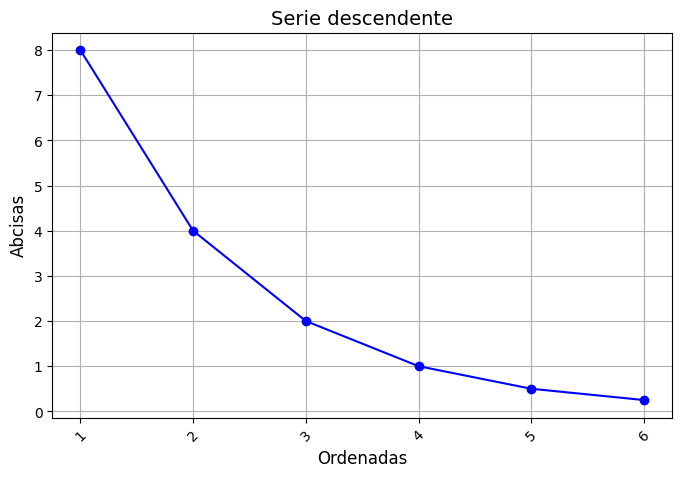

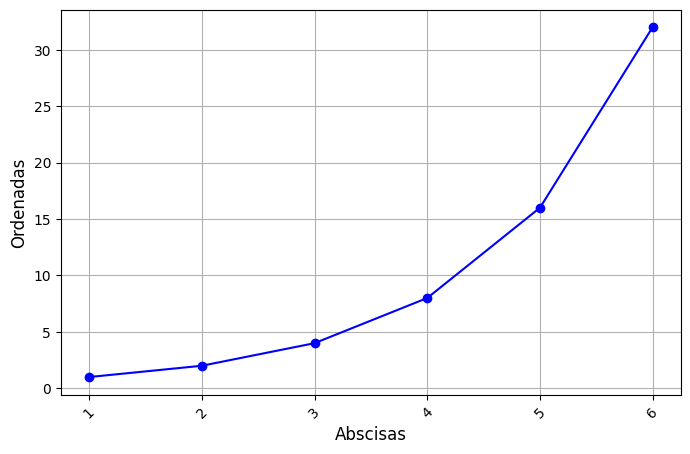

In [256]:
representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Serie descendente", "Ordenadas", "Abcisas"])
representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

### Una gráfica concreta

Deseamos representar el número de películas de nuestra base de datos que se han producido en un intervalo de años dado.

In [257]:

def repr_movies_years(data: dict, start_year: int, end_year: int) -> None:
    """
    Prints graph model to represent the number of films of our database
    which have been produced in an interval of years given.    
    
    Parameters
    ----------
    data : dict
        Dictionary containing movie data with keys as (title, year)
        and values as other attributes
    start_year : int
        The starting year of the range (inclusive)
    end_year : 
        The ending year of the range (inclusive)

    Returns
    -------
    None
    """
    year_counts = {}
    for (title, year) in data.keys():
        if start_year <= year <= end_year:
            if year in year_counts:
                year_counts[year] += 1
            else:
                year_counts[year] = 1

    sorted_years = sorted(year_counts.keys())
    counts = [year_counts[year] for year in sorted_years]
    
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_years, counts, color='b')
    plt.title(f"Number of Movies Produced ({start_year}-{end_year})")
    plt.xlabel("Year")
    plt.ylabel("Number of Movies")
    plt.xticks(sorted_years, rotation=45)
    plt.grid(True)
    plt.show()

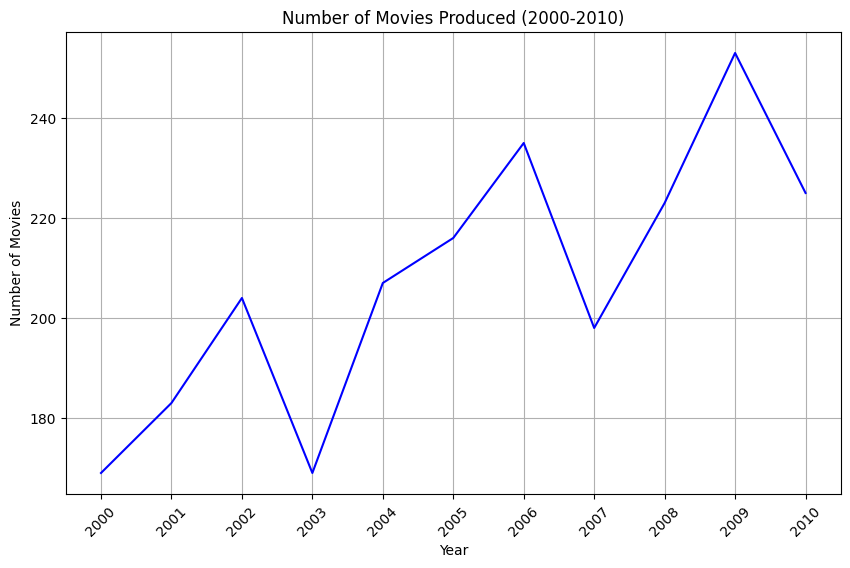

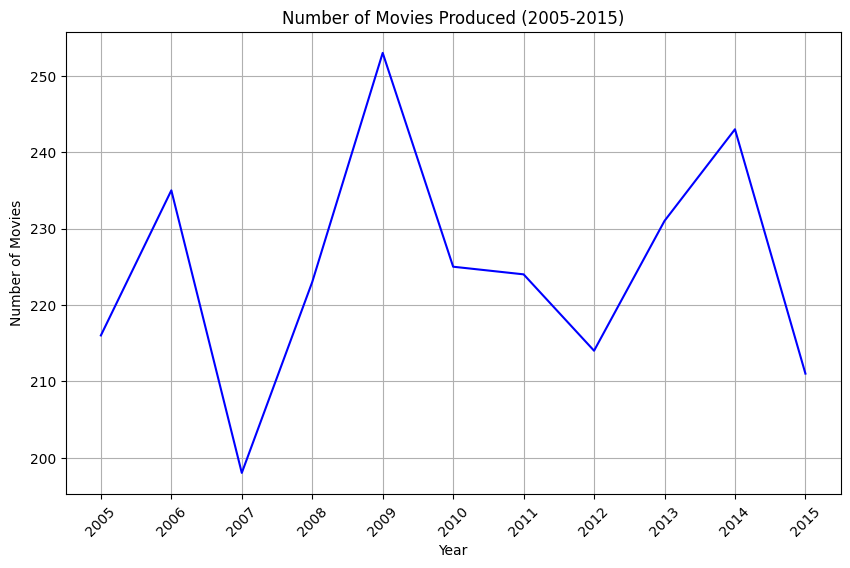

In [258]:
repr_movies_years(main_dict_data, 2000, 2010)
repr_movies_years(main_dict_data, 2005, 2015)

# D. Acceso a las urls de imdb y webscraping [2 puntos]

### D.1. Recuperación de las URLs

Con sencillas instrucciones, deseamos recuperar todas las *urls* de las películas de nuestro archivo, mostrando cuántas son, la primera de ellas o las diez primeras por ejemplo:

In [259]:
def get_urls(data: dict) -> list:
    """
    Retrieve all URLs from the dataset

    Parameters
    ----------
    data : dict
        Dictionary containing movie data with keys as (title, year)
        and values as other attributes

    Returns
    -------
    list
        A list of URLs
    """
    urls = []

    for attributes in data.values():
        imdb_url = attributes[-1]  
        urls.append(imdb_url)

    return urls

In [260]:
urls = get_urls(main_dict_data)
first_url_movie = urls[0] 
first_ten_urls = urls[:10]

print(len(urls))

print()

print(first_url_movie)

print()

print(first_ten_urls)

4919

http://www.imdb.com/title/tt0499549/

['http://www.imdb.com/title/tt0499549/', 'http://www.imdb.com/title/tt0449088/', 'http://www.imdb.com/title/tt2379713/', 'http://www.imdb.com/title/tt1345836/', 'http://www.imdb.com/title/tt5289954/', 'http://www.imdb.com/title/tt0401729/', 'http://www.imdb.com/title/tt0413300/', 'http://www.imdb.com/title/tt0398286/', 'http://www.imdb.com/title/tt2395427/', 'http://www.imdb.com/title/tt0417741/']


In [261]:
# Una forma de evitar el error "Requests 403 forbidden" al hacer web scraping en las siguientes celdas:

HEADERS = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }

### D.2. Carga de la estructura sintáctica de una URL

Ahora, deseamos extraer el código `html` de una película.

In [262]:
def soup_movie(url: str) -> BeautifulSoup:
    html_code = requests.get(url, headers = HEADERS).text
    soup = BeautifulSoup(html_code, 'html.parser')
    return soup 

In [263]:
soup = soup_movie(first_url_movie)
print(str(soup)[:1000])
print()
print("... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...")
print()
print(str(soup)[-1000:])

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1733738651172);
        }
    })</script><title>Avatar (2009) - IMDb</title><meta content="Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and pr

### D.3. Extracción de algunas piezas de información de una URL

Y ahora, con dicho código, deseamos extraer la siguiente información, referida a la película `first_url_movie`:

- La etiqueta completa del título de la película
- La descripción (sólo el contenido).
- La lista de los actores del *reparto principal*
- La información sobre el presupuesto

In [264]:
def soup_find(soup: BeautifulSoup) -> dict:
    """
    Extract details from a BeautifulSoup object of a movie's IMDb page

    Parameters
    ----------
    soup : BeautifulSoup
        A BeautifulSoup object containing the parsed HTML content of the IMDb movie page

    Returns
    -------
    dict
        A dictionary containing the movie's title tag, description, main cast, and budget
    """
    title_tag = soup.find('title')
    title = title_tag if title_tag else "No title available."
    
    description_meta = soup.find('meta', attrs={'name': 'description'})
    description = description_meta['content'] if description_meta else "No description available."

    cast_list = []
    cast_section = soup.find('section', attrs={'data-testid': 'title-cast'})
    if cast_section:
        cast_anchors = cast_section.find_all('a', attrs={'data-testid': 'title-cast-item__actor'})
        cast_list = [actor.text.strip() for actor in cast_anchors if actor and actor.text]
    if not cast_list:
        cast_list = "No cast information available"

    boxoffice_section = soup.find('div', attrs={'data-testid': 'title-boxoffice-section'})
    if boxoffice_section:
        budget_span = boxoffice_section.find('span', string="Budget")
        if budget_span:
            budget_item = budget_span.find_next('span', class_='ipc-metadata-list-item__list-content-item')
            budget = budget_item.text.strip() if budget_item else "No budget information available."

    return {
        "Title Tag": title,
        "Description": description,
        "Main Cast": cast_list,
        "Budget": budget,
    }

In [265]:
movie_details = soup_find(soup)
for value in movie_details.values():
    print(f"{value}")

<title>Avatar (2009) - IMDb</title>
Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.
['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Michelle Rodriguez', 'Stephen Lang', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy']
$237,000,000 (estimated)


### D.4. Actores que intervienen en una lista de URLs

Necesitamos crear un archivo con los actores del reparto principal de las películas de IMDB, dada la lista de sus URLs.

In [266]:
def gather_actors(file_path: str, urls: list) -> None:
    """
    Fetch the main cast of movies from some URLs and save them to a file

    Parameters
    ----------
    file_path : str
        Path to the output file where actor names will be saved
    urls : list
        List of URLs for the movies

    Returns
    -------
    None
    """
    with open(file_path, mode="w", encoding="utf-8") as file:
        for url in urls:
            html_code = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text
            soup = BeautifulSoup(html_code, 'html.parser')

            cast_section = soup.find('section', attrs={'data-testid': 'title-cast'})
            if cast_section:
                cast_anchors = cast_section.find_all('a', attrs={'data-testid': 'title-cast-item__actor'})
                cast_list = [actor.text.strip() for actor in cast_anchors if actor and actor.text]

                for actor in cast_list:
                    file.write(f"{actor}\n")
            else:
                file.write("No cast information available\n")

In [267]:
gather_actors("./data_out/actors_3_first_movies.txt", urls[:3])
! type data_out\actors_3_first_movies.txt

Sam Worthington
Zoe Saldana
Sigourney Weaver
Michelle Rodriguez
Stephen Lang
Giovanni Ribisi
Joel David Moore
CCH Pounder
Wes Studi
Laz Alonso
Dileep Rao
Matt Gerald
Sean Anthony Moran
Jason Whyte
Scott Lawrence
Kelly Kilgour
James Patrick Pitt
Sean Patrick Murphy
Johnny Depp
Orlando Bloom
Keira Knightley
Geoffrey Rush
Jack Davenport
Bill Nighy
Jonathan Pryce
Lee Arenberg
Mackenzie Crook
Kevin McNally
David Bailie
Stellan Skarsgård
Tom Hollander
Naomie Harris
Martin Klebba
David Schofield
Lauren Maher
Dermot Keaney
Daniel Craig
Christoph Waltz
Léa Seydoux
Ralph Fiennes
Monica Bellucci
Ben Whishaw
Naomie Harris
Dave Bautista
Andrew Scott
Rory Kinnear
Jesper Christensen
Alessandro Cremona
Stephanie Sigman
Tenoch Huerta
Adriana Paz
Domenico Fortunato
Marco Zingaro
Stefano Elfi DiClaudia


In [268]:
#import time 

#reloj_inicio = time.time()
#gather_actors("./data_out/actors_all_movies.txt", urls)
#reloj_fin = time.time()

#print("Tiempo invertido: %s segundos." % (reloj_fin - reloj_inicio))

# E. Pandas [2 puntos]

### E.1. El primer paso es la carga del archivo en un dataframe

In [269]:
def load_dataframe(file_path: str, sep: str = ",", header: int = 0, 
                   encoding: str = "utf-8") -> pd.DataFrame:
    """
    Load a dataset into a Pandas DataFrame.

    Parameters
    ----------
    file_path : str
        The path to the dataset file (CSV, TSV, or similar
    sep : str, optional
        The delimiter used in the dataset file
        Defaults to ',' (comma-separated values)
    header : int, optional
        Row number to use as column names. Defaults to 0 (first row)
    encoding : str, optional
        File encoding. Defaults to 'utf-8'

    Returns
    -------
    pd.DataFrame
        A Pandas DataFrame containing the loaded dataset
    """
    df = pd.read_csv(file_path, sep=sep, header=header, encoding=encoding)
    return df

In [270]:
tabla_completa = load_dataframe(MOVIES_DATA)
tabla_completa

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


### E.2. Tabla de los campos principales

A pertir de la tabla anterior, construimos otra con sólo algunos de los campos:

In [271]:
def fields_selected_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create a new table with only specified fields and save it to a file

    Parameters
    ----------
    df : pd.DataFrame
        The original DataFrame containing the full dataset

    Returns
    -------
    pd.DataFrame
        The modified DataFrame containing only a few of the fields
    """
    selected_columns = ['movie_title', 'color', 'director_name', 'language',
                        'country', 'actor_1_name', 'movie_imdb_link']

    missing_columns = [col for col in selected_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Missing columns in the DataFrame: {missing_columns}")

    filtered_df = df[selected_columns]
    return filtered_df

In [272]:
tabla_breve = fields_selected_dataframe(tabla_completa)
tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,NaN,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.3. Columnas de una tabla

¿Cuáles son las columnas de nuestra `tabla_breve`?

In [273]:
tabla_breve.columns

Index(['movie_title', 'color', 'director_name', 'language', 'country',
       'actor_1_name', 'movie_imdb_link'],
      dtype='object')

### E.4. Campos missing

Algunos campos muestran un valod `NaN`. Deseamos cambiarlo por una cadena de caracteres: `"Desc"`.

In [274]:
def replace_missing_values(df: pd.DataFrame, replacement: str = "Desc") -> pd.DataFrame:
    """
    Replace NaN values in the DataFrame with a specified string

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame with potential NaN values
    replacement : str, optional
        The string to replace NaN values with. Defaults to "Desc"

    Returns
    -------
    pd.DataFrame
        A new DataFrame with NaN values replaced
    """
    return df.fillna(replacement)

In [275]:
tabla_breve = replace_missing_values(tabla_breve)
tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Desc,Doug Walker,Desc,Desc,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,Desc,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.5. Director $\rightarrow$ películas y número de películas

Función que averigua la lista de títulos de películas de un director dado:

In [276]:
def movies_by_director(df: pd.DataFrame, director_name: str) -> pd.DataFrame:
    """
    Retrieve a list of movie titles directed by a specific director

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame containing movie data, including director and title fields
    director_name : str
        The name of the director to search for

    Returns
    -------
    pd.DataGrame
        A DataFrame of movie titles directed by the given director
    """
    filtered_movies = df[df["director_name"] == director_name]
    return filtered_movies[["movie_title"]]

In [277]:
tabla_tits = movies_by_director(tabla_breve, "James Cameron")
tabla_tits

,movie_title
0,Avatar
26,Titanic
288,Terminator 2: Judgment Day
291,True Lies
606,The Abyss
2486,Aliens
3575,The Terminator


In [278]:
list_tits = tabla_tits["movie_title"].to_list()
print(list_tits)

['Avatar\xa0', 'Titanic\xa0', 'Terminator 2: Judgment Day\xa0', 'True Lies\xa0', 'The Abyss\xa0', 'Aliens\xa0', 'The Terminator\xa0']


Deseamos saber qué directores han dirigido el máximo número de películas, junto con ese número de películas.

In [279]:
def directors_max_movies_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    Find the directors who have directed the maximum number of movies

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame containing movie data, including director and title fields

    Returns
    -------
    tuple
        A tuple containing:
        - A list of director names who have directed the maximum number of movies
        - The maximum number of movies
    """
    df = df[df["director_name"] != "Desc"]
    directors = df["director_name"].dropna().unique()
    director_counts = []
    for director in directors:
        movie_count = len(movies_by_director(df, director)["movie_title"].to_list())
        director_counts.append((director, movie_count))
    counts_df = pd.DataFrame(director_counts, columns=["director_name", "movie_count"])
    max_movies = counts_df["movie_count"].max()
    top_directors = counts_df[counts_df["movie_count"] == max_movies]["director_name"].tolist()
    return top_directors, int(max_movies)

In [280]:
directors_max_movies_df(tabla_breve)

(['Steven Spielberg'], 26)

# Parte F. Un cálculo masivo con map-reduce [0,5 puntos]

En este apartado se ha de realizar un programa aparte, *basado en la técnica de map-reduce*, que calcule, para cada idioma, en qué países en que se han producido películas y la suma de los presupuestos de dichas películas. Cuando el idioma o el país o el presupuesto no se conozcan, no se considerará esta película.

    C:\...> python language_budget_countries.py -q algunos_campos.txt

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [281]:
! python language_budget_countries.py -q data_in/few_fields.txt

"Aboriginal"	[["UK", "Australia"], 86000000]
"Arabic"	[["Turkey", "Egypt", "France", "United Arab Emirates"], 11225000]
"Aramaic"	[["USA"], 30000000]
"Bosnian"	[["USA"], 13000000]
"Cantonese"	[["Hong Kong", "China"], 154500000]
"Chinese"	[["China"], 12000000]
"Czech"	[["Czech Republic"], 84450000]
"Danish"	[["Denmark"], 50100000]
"Dari"	[["USA", "Afghanistan"], 20046000]
"Dutch"	[["Netherlands"], 32150000]
"Dzongkha"	[["Australia"], 1800000]
"English"	[["USA", "UK", "New Zealand", "Canada", "Australia", "Germany", "China", "New Line", "France", "Japan", "Spain", "Hong Kong", "Czech Republic", "South Korea", "Peru", "Italy", "Aruba", "Denmark", "Libya", "Belgium", "Ireland", "South Africa", "Switzerland", "Romania", "West Germany", "Chile", "Hungary", "Russia", "Mexico", "Panama", "Greece", "Netherlands", "Norway", "Official site", "Bulgaria", "Iran", "Georgia", "India", "Thailand", "Nigeria", "Bahamas", "Iceland", "Brazil", "Poland", "Kyrgyzstan", "Philippines"], 141954875246]
"Filipin

In [282]:
# Para que el resultado se almacene en un archivo:

! python language_budget_countries.py -q data_in/few_fields.txt > data_out/language_countries_budgets.txt

La siguiente celda me permite ver tu programa cómodamente desde aquí.

In [283]:
def print_file(filename):
    with open(filename, "r") as f:
        for line in f:
            print(line, end="")
            
print_file("language_budget_countries.py")

from mrjob.job import MRJob

def to_int(value):
    """
    Safely convert a value to int. Return -1 if conversion fails.
    """
    try:
        return int(value)
    except ValueError:
        return -1
    
class LanguageBudgetCountries(MRJob):
    
    def mapper(self, _, line):
        """
        Mapper: Extracts relevant fields for each movie.
        Only considers rows where language, country, and budget are non-empty.
        """
        fields = line.split('|')
        if len(fields) < 5:
            return
        title, year, language, country, budget = fields

        if not language.strip() or not country.strip() or to_int(budget) == -1:
            return

        yield language.strip(), (country.strip(), to_int(budget))

    def reducer(self, key, values):
        """
        Reducer: Aggregates the budget for each language, with countries listed.
        """
        country_budgets = {}
        for country, budget in values:
            if country not in country_budg

# Parte G. Un apartado libre [0.5 puntos]

<font color="darkblue">
Voy a llevar a cabo un análisis exploratorio enfocado en los géneros de las películas, utilizando visualizaciones generadas con Matplotlib y Seaborn para identificar patrones y relaciones clave.:

- 1. Análisis basado en combinaciones de géneros presentes en el conjunto de datos: Investigaré cómo las combinaciones específicas de géneros presentes en las películas influyen en las mismas métricas, identificando patrones asociados a las combinaciones más populares.

- 2. Análisis de cada género de forma individual: Examinaré el impacto de cada género de manera independiente, evaluando su contribución a las métricas de éxito, como los ingresos ('gross') y la puntuación IMDb ('imdb_score').

- 3. Análisis considerando un único género principal por película: Analizaré la relación entre el género principal de cada película y variables clave, como los ingresos ('gross'), la puntuación IMDb ('imdb_score') y el presupuesto ('budget') mediante un gráfico de dispersión.

</font>

In [284]:
def load_selected_columns(file_path: str, columns: List) -> pd.DataFrame:
    """
    Import selected columns from a CSV file into a Pandas's DataFrame
    
    Parameters:
    ----------
    file_path : str
        Path to the csv file
    columns : list
        List of columns's names
    
    Returns:
    -------
    pd.DataFrame
        DataFrame with the selected columns
    """
    try:
        df = pd.read_csv(file_path, usecols=columns)
        if 'budget' in df.columns:
            df['budget'] = df['budget'].fillna(-1)
        if 'gross' in df.columns:
            df['gross'] = df['gross'].fillna(-1)
        if 'imdb_score' in df.columns:
            df['imdb_score'] = df['imdb_score'].fillna(-1)
        return df
    
    except ValueError as e:
        print(f"Error: Una o más columnas no se encontraron en el archivo. {e}")
        return None
    except FileNotFoundError:
        print(f"Error: El archivo no fue encontrado en la ruta proporcionada: {file_path}")
        return None

columns = ['movie_title', 'genres', 'gross', 'budget', 'imdb_score']
selected_data = load_selected_columns(MOVIES_DATA, columns)

In [285]:
selected_data

,gross,genres,movie_title,budget,imdb_score
0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,237000000.0,7.9
1,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,300000000.0,7.1
2,200074175.0,Action|Adventure|Thriller,Spectre,245000000.0,6.8
3,448130642.0,Action|Thriller,The Dark Knight Rises,250000000.0,8.5
4,-1.0,Documentary,Star Wars: Episode VII - The Force Awakens ...,-1.0,7.1
...,...,...,...,...,...
5038,-1.0,Comedy|Drama,Signed Sealed Delivered,-1.0,7.7
5039,-1.0,Crime|Drama|Mystery|Thriller,The Following,-1.0,7.5
5040,-1.0,Drama|Horror|Thriller,A Plague So Pleasant,1400.0,6.3
5041,10443.0,Comedy|Drama|Romance,Shanghai Calling,-1.0,6.3


In [286]:
genre_combinations = selected_data['genres'].value_counts()
genre_combinations

genres
Drama                                 236
Comedy                                209
Comedy|Drama                          191
Comedy|Drama|Romance                  187
Comedy|Romance                        158
                                     ... 
Action|Biography|Documentary|Sport      1
Comedy|Mystery|Thriller                 1
Horror|Musical                          1
Action|Romance|Sport                    1
History                                 1
Name: count, Length: 914, dtype: int64

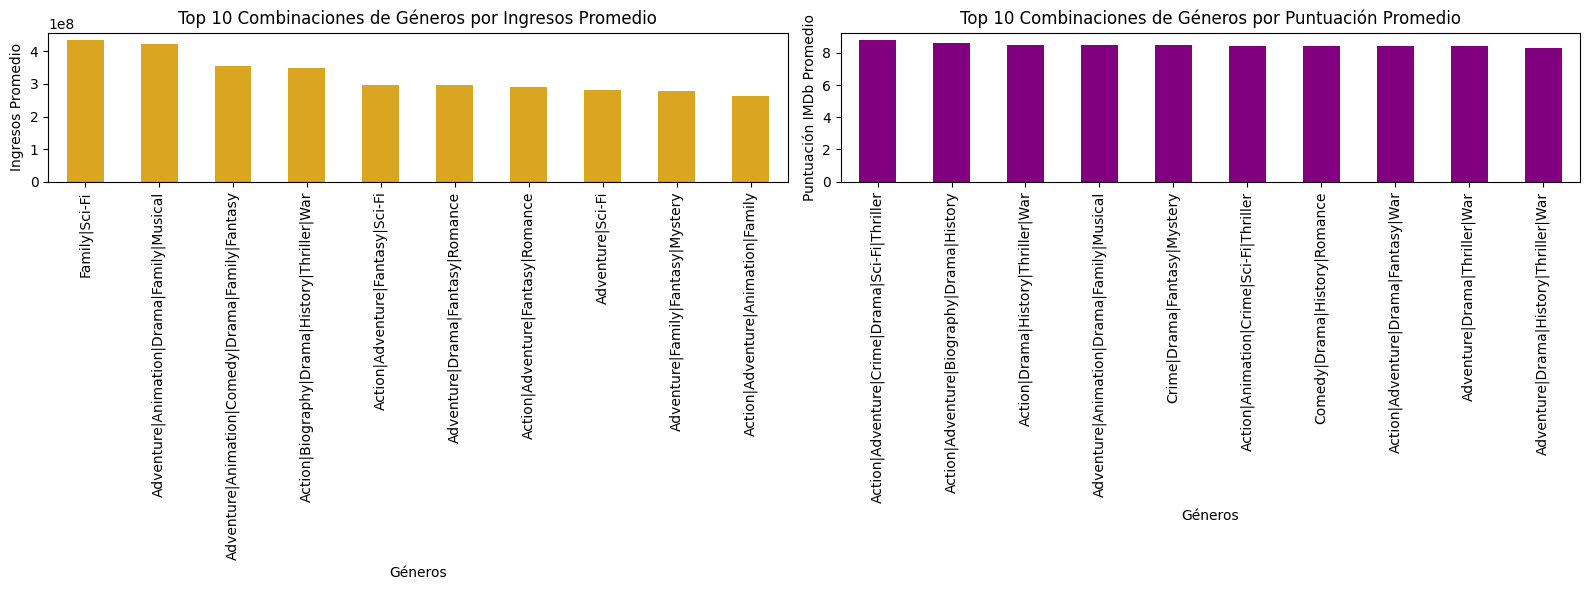

In [287]:
def plot_genre_combinations(data: pd.DataFrame) -> None:
    """
    Plots the top 10 genre combinations based on average gross income 
    and IMDb scores, excluding rows where 'gross' or 'imdb_score' 
    are set to -1

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame containing at least the columns 'genres', 'gross', 
        and 'imdb_score'

    Returns
    -------
    None
    """
    filtered_gross = data[(data['gross'] != -1)]
    filtered_imdb = data[(data['imdb_score'] != -1)]


    gross_avg = filtered_gross.groupby('genres')['gross'].mean().sort_values(
        ascending=False
    )
    imdb_avg = filtered_imdb.groupby('genres')['imdb_score'].mean().sort_values(
        ascending=False
    )

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    gross_avg.head(10).plot(
        kind='bar',
        ax=axes[0],
        title="Top 10 Combinaciones de Géneros por Ingresos Promedio",
        legend=False,
        color='goldenrod'
    )
    axes[0].set_xlabel("Géneros")
    axes[0].set_ylabel("Ingresos Promedio")
    axes[0].tick_params(axis='x', rotation=90)

    imdb_avg.head(10).plot(
        kind='bar',
        ax=axes[1],
        title="Top 10 Combinaciones de Géneros por Puntuación Promedio",
        legend=False,
        color='purple'
    )
    axes[1].set_xlabel("Géneros")
    axes[1].set_ylabel("Puntuación IMDb Promedio")
    axes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

plot_genre_combinations(selected_data)

<font color="darkblue">
Esta tabla evalúa cómo las combinaciones específicas de géneros afectan los ingresos y a la puntuación IMDB promedio. Cada barra representa una combinación única de géneros presentes en las películas.
</font>

In [288]:
genres_binary = selected_data['genres'].str.get_dummies('|')
genres_binary

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5039,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
5040,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5041,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


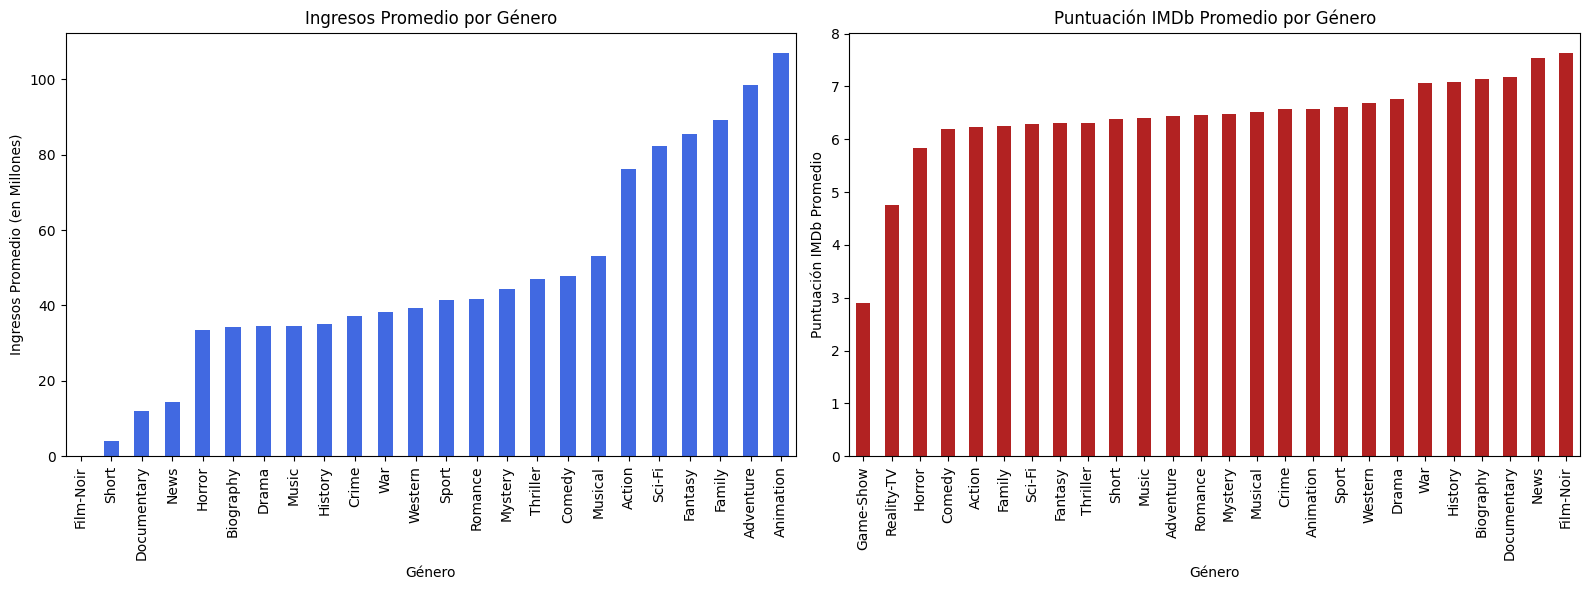

In [289]:
def plot_genre_binary(data: pd.DataFrame) -> None:
    """
    Plots the average gross income (in millions) and IMDb scores for individual genres,
    excluding rows where 'gross' or 'imdb_score' are set to -1

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame containing at least the columns 'gross' and 'imdb_score'
    genres_binary : pd.DataFrame
        DataFrame where each genre is represented as a binary column

    Returns
    -------
    None
    """
    filtered_gross = data[(data['gross'] != -1)]
    filtered_imdb = data[(data['imdb_score'] != -1)]

    genres_binary_gross = filtered_gross['genres'].str.get_dummies('|')
    genres_binary_imdb = filtered_imdb['genres'].str.get_dummies('|')

    wsum_gross = genres_binary_gross.multiply(filtered_gross['gross'] / 1_000_000, axis=0).sum()
    wsum_imdb = genres_binary_imdb.multiply(filtered_imdb['imdb_score'], axis=0).sum()

    genre_counts_gross = genres_binary_gross.sum()
    genre_counts_imdb = genres_binary_imdb.sum()
    
    avg_gross = (wsum_gross / genre_counts_gross).sort_values()
    avg_imdb = (wsum_imdb / genre_counts_imdb).sort_values()

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    avg_gross.plot(
        kind='bar',
        ax=axes[0],
        title="Ingresos Promedio por Género",
        legend=False,
        color='royalblue'
    )
    axes[0].set_xlabel("Género")
    axes[0].set_ylabel("Ingresos Promedio (en Millones)")
    axes[0].tick_params(axis='x', rotation=90)

    avg_imdb.plot(
        kind='bar',
        ax=axes[1],
        title="Puntuación IMDb Promedio por Género",
        legend=False,
        color='firebrick'
    )
    axes[1].set_xlabel("Género")
    axes[1].set_ylabel("Puntuación IMDb Promedio")
    axes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

plot_genre_binary(selected_data)

<font color="darkblue">
Esta tabla muestra el promedio de ingresos brutos ('gross') y de puntuación IMDb ('imdb_score') generados por las películas en las que aparece cada género. Aquí cada género es tratado de forma independiente, lo que significa que una película con múltiples géneros contribuye a los promedios de todos los géneros asociados.

Conclusiones:

- Géneros con ingresos promedio más altos suelen estar asociados a producciones de mayor presupuesto o géneros con amplia audiencia, como "Adventure", "Comedy" o "Action". Géneros con ingresos promedio más bajos, como "Documentary" o "Western", probablemente están vinculados a películas de nicho o producciones independientes.

- Géneros como "Drama" y "Comedy" tienen puntuaciones IMDb más altas, lo que sugiere que, generen o no generen grandes ingresos, son valorados positivamente por el público o críticos. Géneros más comerciales como "Family" o "Fantasy" tienden a tener puntuaciones más moderadas, lo que podría reflejar un enfoque mayor en la taquilla que en la calidad narrativa.

</font>

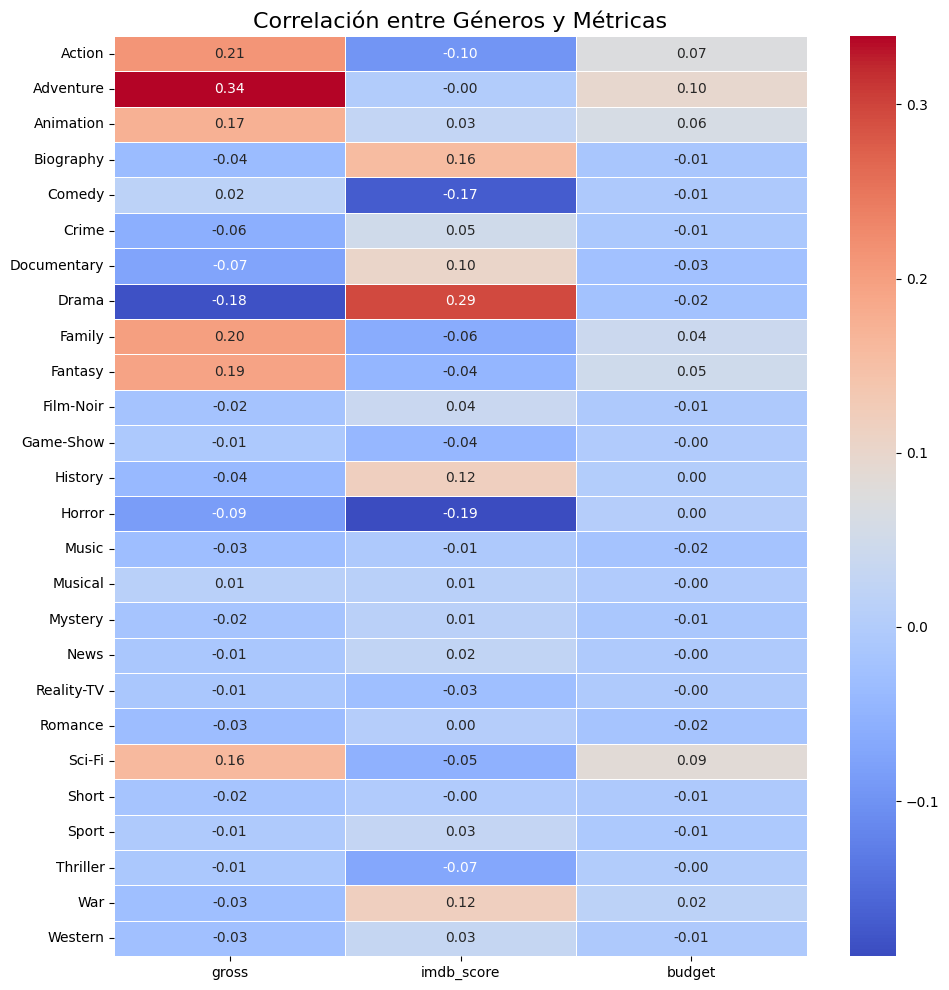

In [290]:
def plot_genre_correlation(data: pd.DataFrame) -> None:
    """
    Plots a heatmap showing the correlation between genres and selected metrics
    (gross income, IMDb score, and budget), excluding rows with values of -1

    Parameters
    ----------
    genres_binary : pd.DataFrame
        DataFrame where each genre is represented as a binary column
    data : pd.DataFrame
        DataFrame containing at least the columns 'gross', 'imdb_score', and 'budget'

    Returns
    -------
    None
    """
    filtered_data = data[
        (data['gross'] != -1) | 
        (data['budget'] != -1) |
        (data['imdb_score'] != -1)
    ]

    genres_binary = filtered_data['genres'].str.get_dummies('|')

    correlation_matrix = pd.concat(
        [genres_binary, filtered_data[['gross', 'imdb_score', 'budget']]],
        axis=1
    ).corr()

    plt.figure(figsize=(10, 10))
    sns.heatmap(
        correlation_matrix.loc[
            genres_binary.columns, 
            ['gross', 'imdb_score', 'budget']
        ],
        annot=True,
        cmap="coolwarm",
        linewidths=0.5,
        fmt=".2f"
    )
    plt.title("Correlación entre Géneros y Métricas", fontsize=16)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_genre_correlation(selected_data)

<font color="darkblue">
Este mapa de calor muestra la correlación entre géneros individuales y métricas como ingresos ('gross'), presupuesto ('budget') y puntuación IMDb ('imdb_score'). Los valores cercanos a 1 indican una fuerte correlación positiva, mientras que los cercanos a -1 representan una fuerte correlación negativa.

Conclusiones:

- Géneros como "Action" y "Adventure" están fuertemente correlacionados con altos presupuestos y grandes ingresos, lo que sugiere su relevancia en producciones comerciales.

- Géneros como "Drama" o "Biography" tienen correlaciones más altas con puntuaciones IMDb, reflejando su reconocimiento crítico.

</font>

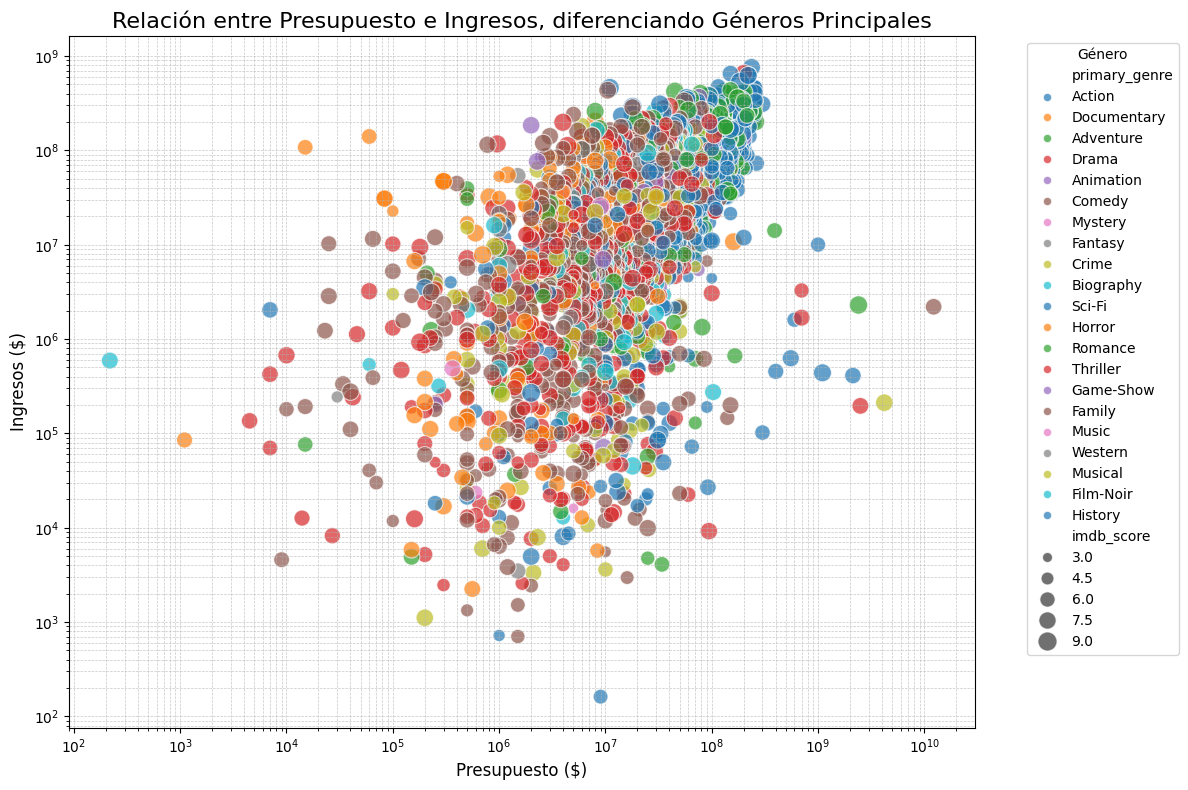

In [291]:
def plot_scatter(data: pd.DataFrame) -> None:
    """
    Plots a scatterplot showing the relationship between budget and gross income,
    differentiated by primary genres and sized by IMDb scores
    Excludes rows where 'budget', 'gross', or 'imdb_score' have values of -1

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame containing at least the columns 'genres', 'budget', 'gross', 
        and 'imdb_score'

    Returns
    -------
    None
    """
    filtered_data = data[
        (data['budget'] != -1) |
        (data['gross'] != -1) |
        (data['imdb_score'] != -1)
    ]
    filtered_data['primary_genre'] = filtered_data['genres'].str.split('|').str[0]

    plt.figure(figsize=(12, 8))
    scatter_plot = sns.scatterplot(
        data=filtered_data,
        x='budget',
        y='gross',
        hue='primary_genre',
        palette='tab10',
        alpha=0.7,
        size='imdb_score',
        sizes=(20, 200)
    )
    scatter_plot.set(xscale="log", yscale="log")
    plt.title(
        'Relación entre Presupuesto e Ingresos, diferenciando Géneros Principales',
        fontsize=16
    )
    plt.xlabel('Presupuesto ($)', fontsize=12)
    plt.ylabel('Ingresos ($)', fontsize=12)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        title='Género'
    )
    plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_scatter(selected_data)

<font color="darkblue">
<span style="text-decoration: underline;">Explicación del Gráfico de dispersión: </span>

Eje X: Representa el presupuesto de cada película (escala logarítmica).

Eje Y: Representa los ingresos generados por cada película (escala logarítmica).

Colores: Diferencian los géneros principales de las películas.

Tamaños de los puntos: Representan la puntuación IMDb de las películas (puntos más grandes indican puntuaciones más altas).

Conclusiones:

- Relación positiva entre presupuesto e ingresos: Las películas con presupuestos más altos tienden a generar mayores ingresos, lo cual es evidente en la acumulación de puntos en la esquina superior derecha.
Sin embargo, no es una relación estricta, ya que también hay películas con presupuestos moderados que generan ingresos elevados.

- Variedad de géneros en altos presupuestos e ingresos: Géneros como "Adventure", "Action" y "Drama" dominan entre las películas con presupuestos e ingresos altos, probablemente debido a su enfoque en producciones comerciales y blockbusters.

- Distribución de puntuaciones IMDb: Las puntuaciones más altas (puntos grandes) están distribuidas de manera dispersa en géneros y niveles de ingresos, lo que sugiere que una alta puntuación no siempre se traduce en altos ingresos.

<font>

# Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** Rodríguez Ropero
-   **Nombre:** Laura
-   **Email:** lauraarodriguez11@gmail.com
-   **Fecha:** 19/12/2001

<br>

<font color="black">
    
### Ficha de autoevaluación

<font color="darkblue">
   
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.5  / 2.5  |Completamente resuelto |
|b)  |2.0  / 2.0  |Completamente resuelto |
|c)  |1.5  / 1.5  |Completamente resuelto |
|d)  |1.0  / 1.0  |Completamente resuelto |
|e)  |2.0  / 2.0  |Completamente resuelto |
|f)  |0.5  / 0.5  |Completamente resuelto |
|g)  |0.4  / 0.5  |Completamente resuelto |
|**Total** |**10.0** / 10.0|**Sobresaliente**|
</font>

<br>

<font color="black">
   
### Ayuda recibida y fuentes utilizadas
    
</font>

<br>

<font color="darkblue">

Fuentes Bibliográficas y Documentación Técnica:

- Documentación oficial de mrjob: https://mrjob.readthedocs.io.
- Documentación de Python sobre manejo de excepciones y tipos de datos: https://docs.python.org/.

Herramientas utilizadas: 

- Visual Studio Code como editor de código.
- Python 3.12.8 para la implementación.

Créditos a la IA: 

- ChatGPT para apoyo en depuración de código, revisión de lógica y explicaciones detalladas sobre procesos MapReduce.
</font>

<br>

<font color="black">
    
### Comentario adicional

</font>

<br>

<font color="darkblue">

He hecho uso del siguiente código para comprobar en algunas celdas si se verifica el formato PEP8. 

<br>

In [ ]:
import pycodestyle

code_snippets = [
    '''# Librerías:

import kagglehub
import os
import csv
from typing import List
from typing import Tuple
from typing import Set
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
''',
    '''# Constantes globales:

MOVIES_DATA = f"{kagglehub.dataset_download('carolzhangdc/imdb-5000-movie-dataset')}/movie_metadata.csv"
FEW_FIELDS_PATH = f"./data_in/few_fields.txt"
'''
]

complete_code = "\n".join(code_snippets)

with open("temp_code.py", "w", encoding="utf-8") as temp_file:
    temp_file.write(complete_code)

style_checker = pycodestyle.StyleGuide(quiet=False)
result = style_checker.check_files(["temp_code.py"])

import os
os.remove("temp_code.py")

print(f"Total de violaciones: {result.total_errors}")

temp_code.py:19:80: E501 line too long (104 > 79 characters)
Total de violaciones: 1


In [292]:
# Esta celda se ha de respetar: está aquí para comprobar
# el funcionamiento de algunas funciones por parte de tu profesor
